In [82]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from IPython.display import HTML

## Problem 1

Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

and then proceeds to apply Simulated Annealing to minimize the function.  This is more or less the same as what has been given above, but you need to encapsulate it all into a simple function and demonstrate how it works on arbitrary functions.  

## Solution

In [83]:
def Simulated_Annealing(func, p0, T, alpha, epoch):
    bestcost=1e5        #initializing a cost
    history=[p0]           #history to keep a track
    bestx= p0
    for i in range(epoch):    
        dx= (np.random.random_sample()-0.5)*T   #taking a random step toward either side of x
        x= bestx+ dx    
        y= func(x)
        if y< bestcost:     #if the outcome is less that bestcost then we are storing that data in history
            bestcost=y
            bestx= x
            history.append(x)
        else:           
            toss= np.random.random_sample()     #else I will toss the soltution and if the toss more than the 
            if toss< np.exp(-(y-bestcost)/T):   #the activation energy then no change else bestcost is y 
                bestcost= y                     #and bestx is the new tossed part
                bestx=x
                history.append(x)
            pass 
        T= T*alpha
    return history, bestx

Now the given function is 

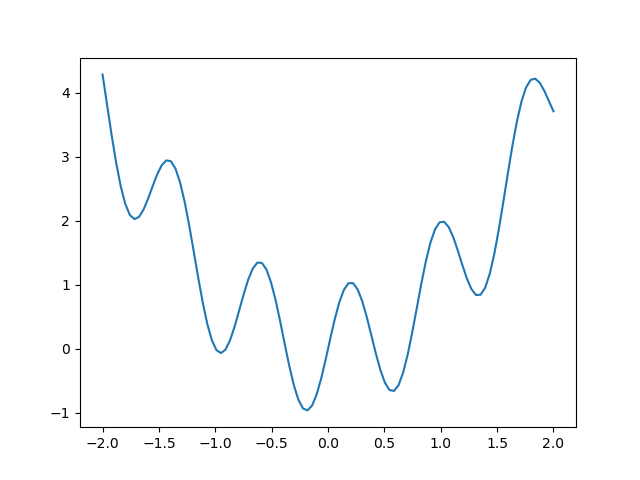

In [143]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
plt.plot(xbase, ybase)
plt.show()

In [85]:
plt.close()

In [142]:
his, sol= Simulated_Annealing(yfunc,0,3,0.95,100)   #now running Annealing and storing the value in history and solution

## Showing how the function proceeded for its search

I am using the history i stored in the Annealing and using it in the update funciton for updating the frame

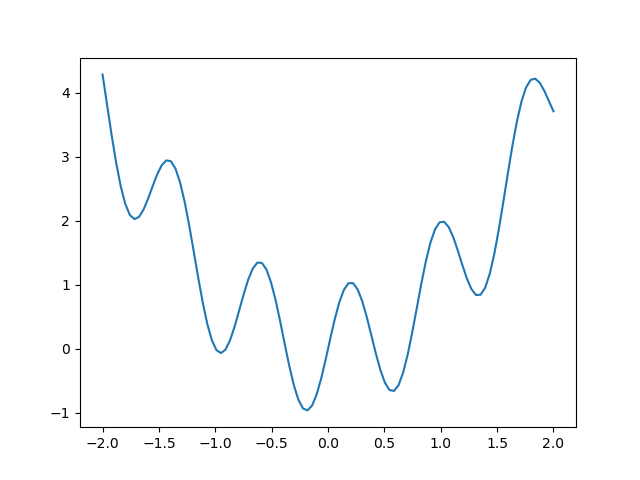

In [87]:
plt.ioff()
fig, ax= plt.subplots()
ax.plot(xbase, ybase)
xall, yall=[],[]
lnall, = ax.plot([],[],'ro')
lngood, = ax.plot([],[],'go', markersize= 10)

def update(frame):
    X= his[frame]
    Y= yfunc(X)
    lngood.set_data(X,Y)
    xall.append(X)
    yall.append(Y)
    lnall.set_data(xall,yall)

anime= FuncAnimation(fig, update, frames= len(his),interval= 100, repeat=False)
plt.show()
HTML(anime.to_jshtml())

In [88]:
plt.close()

# Problem 2 

Note that part 2 is also part of the regular assignment.  It is **not** optional, but is specified as a separate problem part to break the overall problem into portions in case you find this too hard to solve at one shot.  

The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

You will be given a file where the first line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
```
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

Your goal is to give a sequence of numbers, for example `[0 3 2 1]` which specifies the order in which to visit the cities.  Note that after the last city you will come back to the first one in the list.  

Plot the cities with the path you have specified, and output the total length of the shortest path discovered so far.

### for the first dataset

In [141]:
#the functions names are pretty self explainatory
def readfile(filename):   
    with open(filename) as f:       
        read= f.read().splitlines()         #opens the file and saves the text in read
    no_towns= int(read[0])                  #number of towns    
    locations=[]
    for element in range(no_towns):         #storing the location in float format
        cor= read[1+element].split()
        absissa= float(cor[0])
        ordinate= float(cor[1])
        locations.append([absissa,ordinate])
    return locations, no_towns

In [90]:
locations, no_towns= readfile("tsp_10.txt")     #loading the data

In [119]:
def distance(x1,y1,x2,y2):      #returns the distance of two points
    return ((x1-x2)**2+ (y1-y2)**2)**(0.5)

def totaldistance(locations,num_of_loc, sol):   #returns the distance according to the path taken
    sum=0
    for pos in range(num_of_loc-1):
        sum += distance(*locations[sol[pos]], *locations[sol[pos+1]])   #it will take city[i] and city[i+1] and
    sum+= distance(*locations[sol[0]], *locations[sol[num_of_loc-1]])   #find distance b/w them
    return sum

In [92]:
x= np.arange(no_towns)          #randomly selecting one solution
x= sorted(x, key=lambda k: random.random())

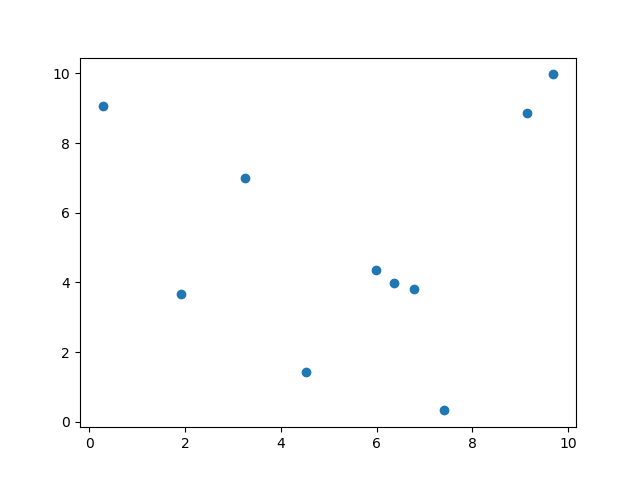

In [93]:
plt.scatter([x[0] for x in locations],[x[1] for x in locations]) #observing the location on the chart
plt.show()

In [94]:
plt.close()

### Approach

so how I will approach is that, first I will pick a random solution. Then I will interchange two random points, and if this way I am getting a better total distance, then I will keep it as bestsolution and furthur on continue to the process. 

In [125]:
def travelling_sales_men(locations, x0, T, alpha,epochs):
    bestx= x0
    bestcost= totaldistance(locations, no_towns, bestx)
    history=[bestx.copy()]
    for iter in range(epochs):
        tempx= bestx
        #so firstly i will interchange the position of two locations picked randomly
        pos1= np.random.randint(0,no_towns-1)
        pos2= np.random.randint(0,no_towns-1)
        while pos1==pos2:
            pos2= np.random.randint(0,9)
        
        #interchanging the place
        tempx[pos1]= tempx[pos1]+ tempx[pos2]
        tempx[pos2]= tempx[pos1]- tempx[pos2]
        tempx[pos1]= tempx[pos1]- tempx[pos2]

        #now finding the new total distance
        y= totaldistance(locations, no_towns, tempx)

        if y< bestcost:
            bestcost=y
            bestx= tempx
            history.append(bestx.copy())
        else: 
            #keeping a random activation energy say in the range of 0,20
            toss= (np.random.random_sample())*20
            if toss< np.exp(-(y-bestcost)/T):
                bestcost= y
                bestx= tempx
                history.append(bestx.copy())
            pass
        T= T*alpha
    return history, bestx
            
            
            



In [96]:
bestdis=1e5
bestsolu= x.copy()
for i in range(1000):   #here i am doing annealing 1000 times in hopes to find the global minima of total dist
    his,sol= travelling_sales_men(locations, bestsolu.copy(),30,0.95,500)
    tempdis= totaldistance(locations, no_towns, sol)
    #but the solution is not nessasary will be the best one
    if tempdis< bestdis:
        bestdis= tempdis
        bestsolu= sol.copy()
        besthist= his.copy()


In [100]:
def return_path(x, locations):  #function to return the location of city according to the path taken
    path=[] 
    for i in x: #iterate through the index of cities
        path.append(locations[i])   #appending the location of city
    path.append(path[0])
    return path

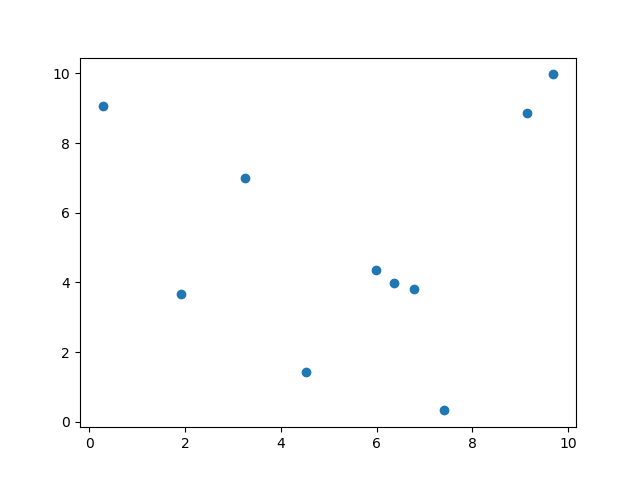

In [101]:
plt.ioff()
fig, ax= plt.subplots()
x_point_of_location= [x[0] for x in locations]
y_point_of_location= [x[1] for x in locations]
ax.scatter(x_point_of_location, y_point_of_location)

lnpath, = ax.plot([],[],'bo', linestyle='--')
def update(frame):
    curent_path= besthist[frame]
    path= return_path(curent_path, locations)
    lnpath.set_data([x[0] for x in path],[x[1] for x in path])

anime= FuncAnimation(fig, update, frames=len(besthist), interval=100, repeat=False)
plt.show()
HTML(anime.to_jshtml())

In [102]:
plt.close()

In [104]:
print("Total distance: ",totaldistance(locations,no_towns,bestsolu))

Total distance:  39.367485114552295


### now for the part 2 second dataset

In [110]:
locations1, no_towns= readfile("tsp_100.txt") #importing the data

x= np.arange(no_towns)      #taking random initial point
x= sorted(x, key=lambda k: random.random())

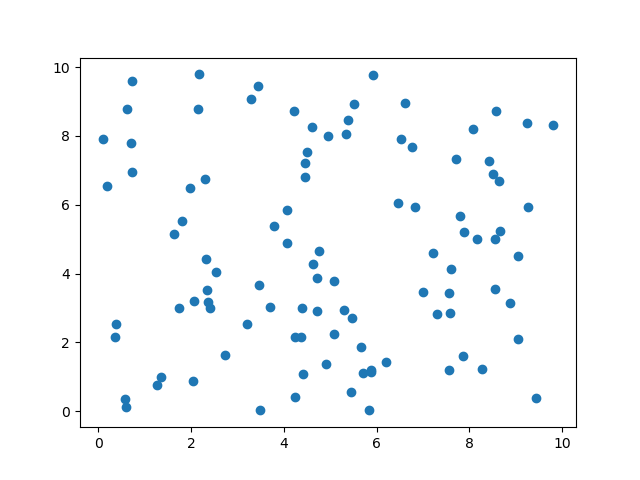

In [111]:
plt.scatter([x[0] for x in locations],[x[1] for x in locations])    #scatter plotting the location of cities
plt.show()

In [112]:
plt.close()

In [137]:
#taking an unimaginably big number just because we have a dataset sample of 100 cities
besthist1,sol= travelling_sales_men(locations1, x.copy(),3,0.9999999,1000000)   


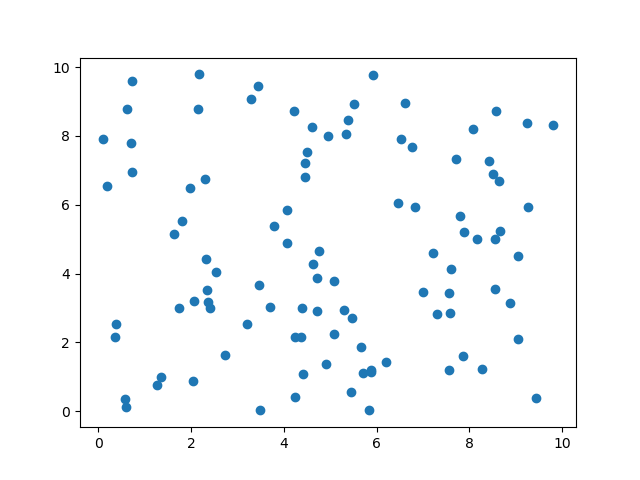

In [139]:
plt.ioff()
fig, ax= plt.subplots()
x_point_of_location= [x[0] for x in locations]
y_point_of_location= [x[1] for x in locations]
ax.scatter(x_point_of_location, y_point_of_location)

lnpath, = ax.plot([],[],'bo', linestyle='--')
def update(frame):
    curent_path= besthist1[frame]
    path= return_path(curent_path, locations)
    lnpath.set_data([x[0] for x in path],[x[1] for x in path])

anime= FuncAnimation(fig, update, frames=len(besthist1), interval=100, repeat=False)
plt.show()
HTML(anime.to_jshtml())

In [129]:
plt.close()

In [140]:
print("Total Distance: ",totaldistance(locations, no_towns,sol))

Total Distance:  483.37754352656236
